In [22]:
import numpy as np
import pandas as pd
import re

In [28]:
df = pd.read_csv('/home/mr1142/Documents/Data/segmentation/splited/validation/validation_data.csv')
labels = [re.split('[|]', df['Finding Labels'][i]) for i in df.index]
labels = [x for xs in labels for x in xs]
labels = list(np.unique(labels))
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [29]:
path = '/home/mr1142/Documents/Data/models/validation_results/validation_results' + '' + '.csv'
df = pd.read_csv(path)

In [30]:
df.sort_values('dice_coef_loss')

,type,name,loss,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
2,unet,_albumentation_validation_2.h5,0.034487,0.034487,0.095812,0.973940,0.974166,7962.0,5701.0
27,uloss,albumentation_rotate_3_validation_2,0.129951,0.034909,0.094568,0.971946,0.973499,87304.0,94711.0
22,uloss,albumentation_rotate_3_validation_1,0.128454,0.035279,0.092766,0.971818,0.972174,78499.0,104346.0
21,unet,albumentation_rotate_3_validation_2,0.035893,0.035434,0.097252,0.971598,0.971085,81626.0,102645.0
4,uloss,_albumentation_validation_2.h5,0.149065,0.036346,0.112719,0.972670,0.973263,6937.0,7392.0
3,unet,_albumentation_validation_3.h5,0.036912,0.036912,0.118864,0.972273,0.971054,7108.0,7429.0
19,unet,albumentation_rotate_3_validation_1,0.037508,0.036994,0.104480,0.970098,0.969842,87088.0,106918.0
0,unet,_albumentation_validation_1.h5,0.037296,0.037296,0.117240,0.971939,0.970628,7386.0,7326.0
32,uloss,validation_rotate_normalization_1,0.134512,0.037305,0.097394,0.970390,0.971013,91815.0,100297.0
29,unet,validation_rotate_normalization_1,0.038100,0.037542,0.103917,0.969410,0.968877,90885.0,107587.0


In [32]:
len(df[df.type == 'uloss'])

20

In [33]:
len(df[df.type == 'uloss']) == len(df[df.type == 'unet'])

True

In [34]:
evaluations = list(df.columns[3:9])

for ev in evaluations:
    print(ev)
    print('unet: {}'.format(np.mean(df[ev][df.type == 'unet'])))
    print('uloss: {}'.format(np.mean(df[ev][df.type == 'uloss'])))
    print('-----')

dice_coef_loss
unet: 0.14948963560163975
uloss: 0.14938836432993413
-----
loss_mask
unet: 0.25327597223222253
uloss: 0.2398192923516035
-----
accuracy
unet: 0.8578997164964676
uloss: 0.8710078924894333
-----
AUC
unet: 0.864571076631546
uloss: 0.8708451747894287
-----
false_positives
unet: 723859.55
uloss: 730438.4
-----
false_negatives
unet: 318466.7
uloss: 427779.9
-----


In [40]:
names = ['_albumentation', 'albumentation_2', 'gamma', 'rotate', 'old', 'clahe', 'norm', 'pre']

In [41]:
tipos = {}
tipos['unet'] = {}
tipos['uloss'] = {}
for ev in evaluations:
    tipos['unet'][ev] = np.mean(df[ev][df.type == 'unet'])
    tipos['uloss'][ev] = np.mean(df[ev][df.type == 'uloss'])
    for name in names:
        index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
        try:
            tipos[name][ev] = np.mean(df[ev].iloc[index])
        except:
            tipos[name] = {}
            tipos[name][ev] = np.mean(df[ev].iloc[index])

In [42]:
tipos

{'unet': {'dice_coef_loss': 0.14948963560163975,
  'loss_mask': 0.25327597223222253,
  'accuracy': 0.8578997164964676,
  'AUC': 0.864571076631546,
  'false_positives': 723859.55,
  'false_negatives': 318466.7},
 'uloss': {'dice_coef_loss': 0.14938836432993413,
  'loss_mask': 0.2398192923516035,
  'accuracy': 0.8710078924894333,
  'AUC': 0.8708451747894287,
  'false_positives': 730438.4,
  'false_negatives': 427779.9},
 '_albumentation': {'dice_coef_loss': 0.038095573584238686,
  'loss_mask': 0.1118261528511842,
  'accuracy': 0.9712880452473959,
  'AUC': 0.9713239371776581,
  'false_positives': 7940.333333333333,
  'false_negatives': 7113.0},
 'albumentation_2': {'dice_coef_loss': 0.041732468331853546,
  'loss_mask': 0.10947780559460323,
  'accuracy': 0.9661622444788615,
  'AUC': 0.9682995776335398,
  'false_positives': 116122.5,
  'false_negatives': 103419.0},
 'gamma': {'dice_coef_loss': 0.1405274923890829,
  'loss_mask': 0.2440120428800583,
  'accuracy': 0.8240348696708679,
  'AUC': 

In [43]:
comparation = {}
for k in tipos['unet'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [44]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
_albumentation,0.038096,0.111826,0.971288,0.971324,7.940333e+03,7.113000e+03
clahe,0.041605,0.112802,0.966717,0.968160,8.510600e+04,8.296350e+04
albumentation_2,0.041732,0.109478,0.966162,0.968300,1.161225e+05,1.034190e+05
gamma,0.140527,0.244012,0.824035,0.850911,1.060549e+06,8.112400e+04
rotate,0.146890,0.253030,0.853679,0.863845,1.176962e+06,3.562139e+05
uloss,0.149388,0.239819,0.871008,0.870845,7.304384e+05,4.277799e+05
unet,0.149490,0.253276,0.857900,0.864571,7.238596e+05,3.184667e+05
norm,0.183969,0.304950,0.814450,0.827910,1.541406e+06,4.409002e+05
pre,0.328917,0.507976,0.660610,0.687298,2.931471e+06,7.137508e+05
old,0.604956,0.764588,0.532896,0.493197,1.231894e+06,1.976492e+06


In [16]:
index = [i for i in df.index if any([bool(re.search(name, df['name'][i])) for name in ['old', 'clahe', 'gamma']])]

In [17]:
df = df.drop(index).reset_index()

In [18]:
tipos = {}
for tipo in ['unet', 'uloss']:
    for ev in evaluations:
        for name in names:
            index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
            try:
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])
            except:
                tipos[tipo + '_' + name] = {}
                tipos[tipo + '_' + name][ev] = np.mean(df[ev].iloc[index][df['type']==tipo])

In [19]:
tipos

{'unet__albumentation': {'dice_coef_loss': 0.3833565759387883,
  'loss_mask': 0.4385370754382827,
  'accuracy': 0.8196963505311445,
  'AUC': 0.7859479730779474,
  'false_positives': 93677.09090909091,
  'false_negatives': 2267684.4545454546},
 'unet_albumentation_2': {'dice_coef_loss': 0.5034062769263983,
  'loss_mask': 0.543918593476216,
  'accuracy': 0.7798305749893188,
  'AUC': 0.7373777131239573,
  'false_positives': 88276.33333333333,
  'false_negatives': 2544670.6666666665},
 'unet_gamma': {'dice_coef_loss': nan,
  'loss_mask': nan,
  'accuracy': nan,
  'AUC': nan,
  'false_positives': nan,
  'false_negatives': nan},
 'unet_rotate': {'dice_coef_loss': 0.1922451143618673,
  'loss_mask': 0.3046679846011102,
  'accuracy': 0.8460246473550797,
  'AUC': 0.844964288175106,
  'false_positives': 966079.875,
  'false_negatives': 916885.25},
 'unet_old': {'dice_coef_loss': nan,
  'loss_mask': nan,
  'accuracy': nan,
  'AUC': nan,
  'false_positives': nan,
  'false_negatives': nan},
 'unet_c

In [20]:
comparation = {}
for k in tipos['uloss_clahe'].keys():
    comparation[k] = []
    for j in tipos.keys():
        comparation[k].append(tipos[j][k])
comparation = pd.DataFrame(comparation)
comparation.index = tipos.keys()

In [21]:
comparation.sort_values('dice_coef_loss')

,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives
unet_norm,0.158531,0.283666,0.848893,0.856764,1.248615e+06,5.365673e+05
unet_rotate,0.192245,0.304668,0.846025,0.844964,9.660799e+05,9.168852e+05
uloss_norm,0.241396,0.369010,0.743285,0.765605,2.579628e+06,5.736734e+05
uloss_rotate,0.276966,0.381527,0.764631,0.771335,1.864516e+06,1.049087e+06
unet_pre,0.277224,0.463242,0.730318,0.746349,2.168833e+06,8.530375e+05
unet_reevaluation,0.360608,0.441528,0.799801,0.776676,7.097676e+05,2.064018e+06
uloss_pre,0.376411,0.547985,0.593163,0.629814,4.173129e+06,8.287155e+05
unet__albumentation,0.383357,0.438537,0.819696,0.785948,9.367709e+04,2.267684e+06
uloss__albumentation,0.413335,0.458305,0.811319,0.776497,1.014793e+05,2.382877e+06
uloss_reevaluation,0.466269,0.537300,0.730199,0.707315,1.203760e+06,2.425165e+06


In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

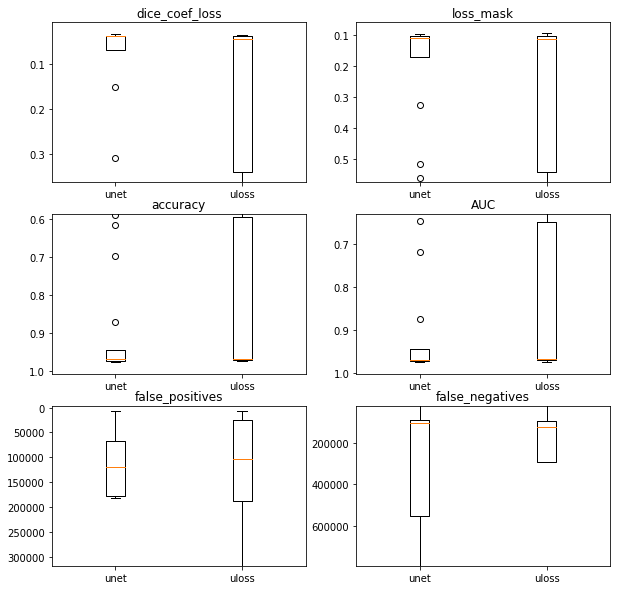

In [299]:
unet = df[['name'] + evaluations][df.type == 'unet'].reset_index()
uloss = df[['name'] + evaluations][df.type == 'uloss'].reset_index()

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(10,10)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    ax[x,y].boxplot([unet[ev], uloss[ev]], labels = ['unet', 'uloss'])
    q1, q3 = np.percentile(df[ev], [20, 80])
    r = q1-q3
    ax[x,y].set_ylim(q1-1.1*r, q3+1.1*r)
    ax[x,y].set_title(ev)

In [300]:
# data = {}
# for tipo in ['unet', 'uloss']:
#     data[tipo] = {}
#     for name in names:
#         d = df[df.type == 'unet'].reset_index()
#         index = [i for i in d.index if bool(re.search(name, d['name'][i]))]
#         data[tipo][name] = d.iloc[index]

In [301]:
data = {}
for name in names:
    index = [i for i in df.index if bool(re.search(name, df['name'][i]))]
    data[name] = df.iloc[index]

In [302]:
data

{'_albumentation':     index   type                                         name      loss  \
 0       0   unet               _albumentation_validation_1.h5  0.037296   
 1       1  uloss               _albumentation_validation_1.h5  0.141863   
 2       2   unet               _albumentation_validation_2.h5  0.034487   
 3       3   unet               _albumentation_validation_3.h5  0.036912   
 4       4  uloss               _albumentation_validation_2.h5  0.149065   
 5       5  uloss               _albumentation_validation_3.h5  0.167991   
 28     45  uloss  s_albumentation_2_validation_1_reevaluation  1.988665   
 29     47  uloss  s_albumentation_2_validation_2_reevaluation  1.937341   
 30     48  uloss  s_albumentation_2_validation_3_reevaluation  1.945580   
 31     49   unet     _albumentation_validation_1_reevaluation  0.034900   
 32     50   unet   _albumentation_2_validation_1_reevaluation  0.984826   
 
     dice_coef_loss  loss_mask  accuracy       AUC  false_positives 

In [303]:
len(datos_unet)

9

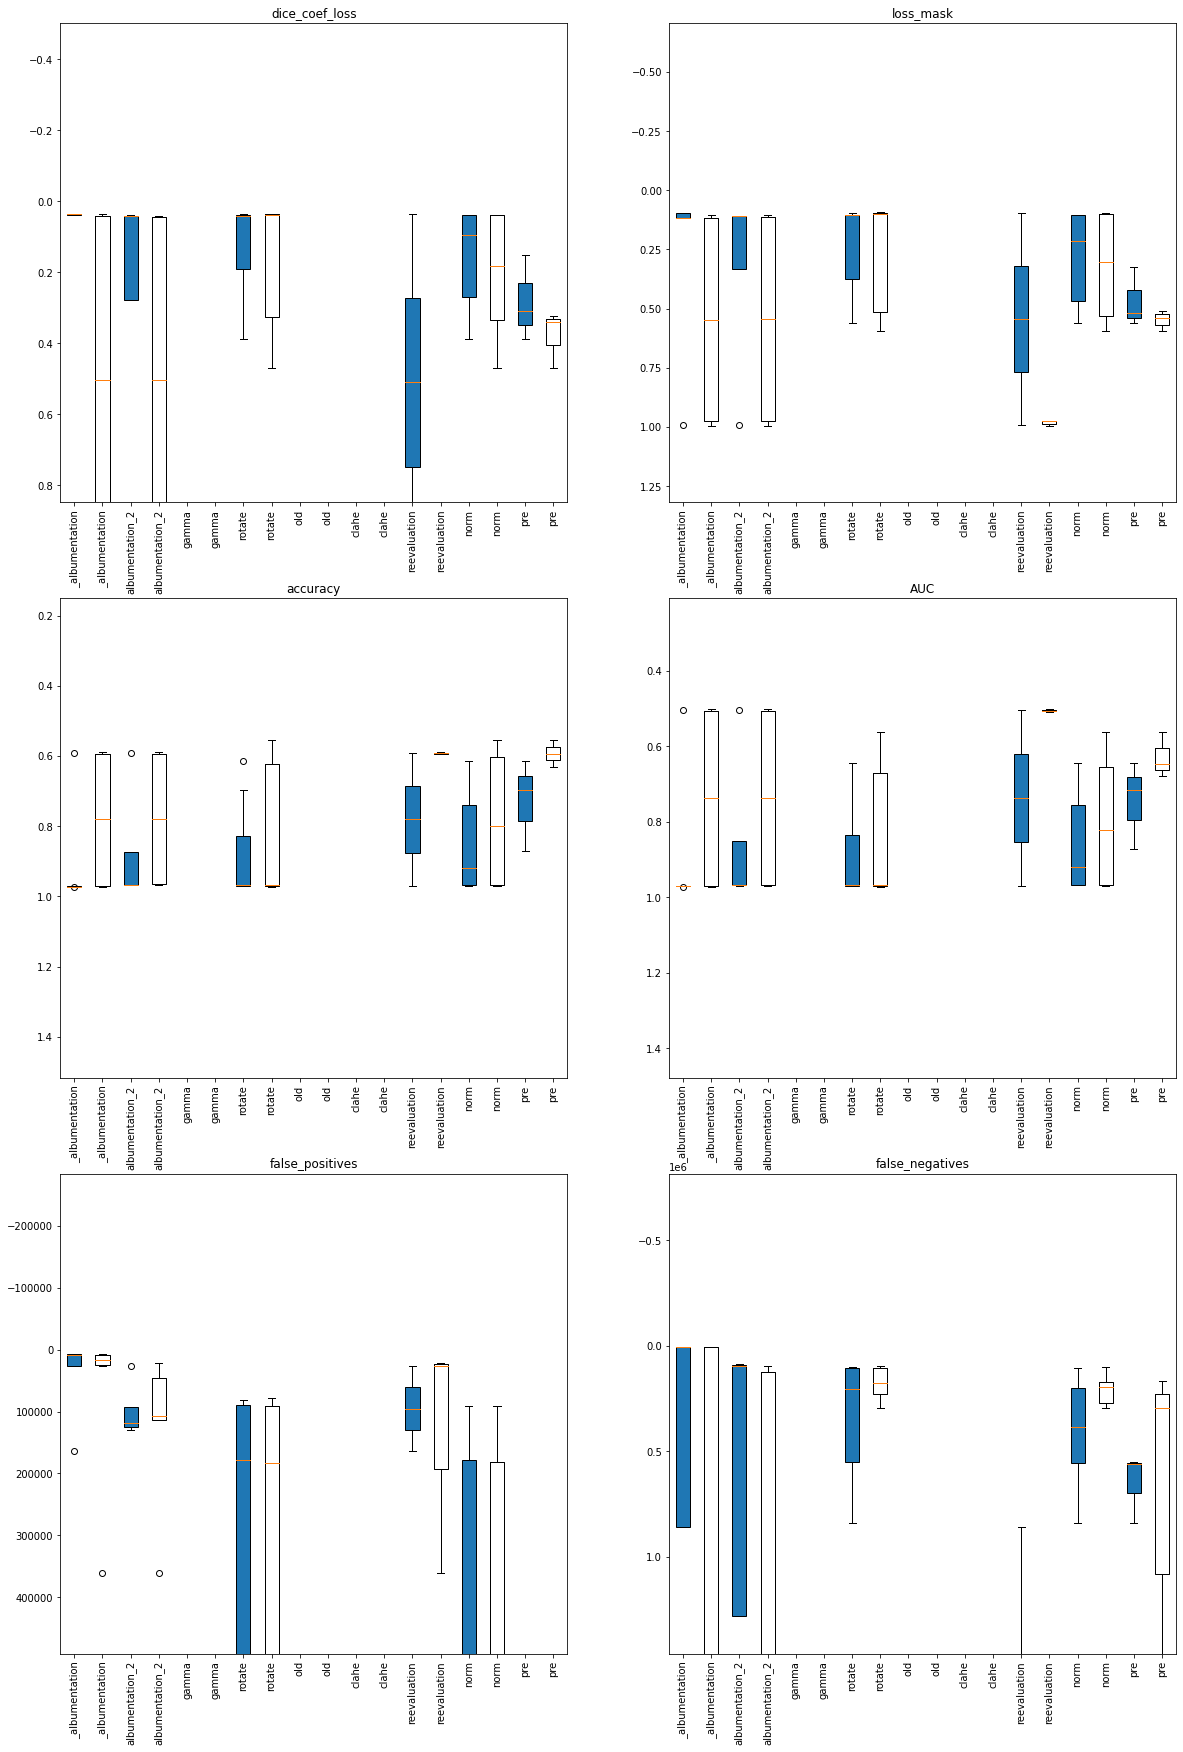

In [304]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(20,30)

for i, ev in enumerate(evaluations):
    if i%2 == 0:
        y = 0
    else:
        y = 1
    x = int(i/2)
    datos_unet = [data[name][ev][data[name].type == 'unet'] for name in names]
    datos_uloss = [data[name][ev][data[name].type == 'uloss'] for name in names]
    labels = [name + '_unet' for name in names]
    ax[x,y].boxplot(datos_unet, positions = [1,3,5,7,9,11,13,15,17], patch_artist=True)
    labels = [name + '_uloss' for name in names]
    ax[x,y].boxplot(datos_uloss, positions = [2,4,6,8,10,12,14,16,18])
    q1, q3 = np.percentile(df[ev], [25, 75])
    r = q1-q3
    ax[x,y].set_xticklabels(names*2, rotation=90)
    ax[x,y].set_ylim(q1-3*r, q3+3*r)
    ax[x,y].set_title(ev)